# Lab 11: Particle Picking

### Due November 20th, 2021 11:59 PM CST

#### Logistics and Lab Submission

See the [course website](https://courses.engr.illinois.edu/ece365/fa2019/logisticsvvv.html).

This lab covers some building blocks used in Cryo-EM particle picking:

- Binary classification using SVMs
- Cross-correlation function (1D/2D)
- Shift-alignment of 1D/2D signals

The submission procedure is provided below:
- You will be provided with a template Python script (main.py) for this lab where you need to implement the provided functions as needed for each question. Follow the instructions provided in this Jupyter Notebook (.ipynb) to implement the required functions. **Do not change the file name or the function headers!**
- <b>This lab contains non-programming questions.</b> These questions will be graded manually and their score will appear after the submission deadline. Write the answers to these questions in the Jupyter notebook.
- Upload <b>BOTH</b> your Python script (.py file) and Jupyter notebook (.ipynb file) on Gradescope.
- Your grades and feedbacks will appear on Gradescope. The grading for the programming questions is automated using Gradescope autograder, no partial credits are given. Therefore, if you wish, you will have a chance to re-submit your code **within 72 hours** of receiving your first grade for this lab, only if you have *reasonable* submissions before the deadline (i.e. not an empty script).
- If you re-submit, the final grade for the programming part of this lab will be calculated as .4 \* first_grade + .6 \* .9 \* re-submission_grade.

The purpose of problems titled `Visualization` are to better understand and test your results visually. `Visualization` problems will <b>NOT</b> be graded.

## Please type all your answers to programming problems in *main.py*. 
## Answers to non-programming problems should be typed in the Jupyter notebook. You need to submit both *main.py* and *Lab11.ipynb*.

#### Preamble (Don't change this)

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.model_selection import train_test_split
import scipy.io

Populating the interactive namespace from numpy and matplotlib


This line runs your python script that you are going to submit. Objects are created for your reference. You can copy-paste this box so you don't need to come up later. **Do not change the file name!**

In [2]:
%run main.py
q1 = Question1()
q2 = Question2()
q3 = Question3()

# Problem 1 : Binary classification using SVM (26 points)

You learned about support vector machines (SVM) in part 1 of the course. In this problem, you will examine SVM with linear and non-linear kernels for a binary classification task. We use three different datasets in this problem. Let's first create and visualize these dataset using `sklearn` library.

In [3]:
num_samples = 1000 # number of samples in the dataset

# X is our data points and y are our labels
X_moon, y_moon = make_moons(n_samples=num_samples, noise=0.1)

X_circ, y_circ = make_circles(n_samples=num_samples, factor=0.5, noise=0.1)

centers = np.array([[1., 1.], [-1., -1.]])
X_blob, y_blob = make_blobs(n_samples=num_samples, centers=centers, cluster_std=0.5, random_state=0)

In these datasets, the labels are $0$ and $1$. We refer to the $0$ and $1$ labels, as negative and positive, resepctively. Now, let's visualize this dataset. In the plots below, the blue/red samples correspond to positive/negative samples.

In [4]:
def visualize_dataset(X, y, name=None):
    plt.figure()
    plt.scatter(X[(y==0), 0], X[(y==0), 1], color='red')
    plt.scatter(X[(y==1), 0], X[(y==1), 1], color='blue')
    if not (name is None):
        plt.title(name)
    plt.show()

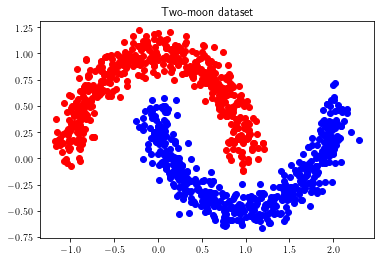

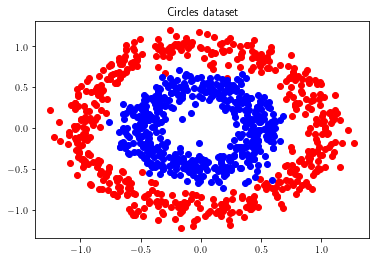

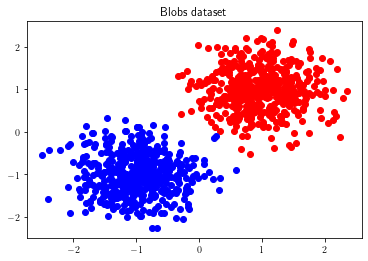

In [5]:
# Let's plot these dataset
# two-moon dataset
visualize_dataset(X_moon, y_moon, name='Two-moon dataset')

# circles dataset
visualize_dataset(X_circ, y_circ, name='Circles dataset')

# blobs dataset
visualize_dataset(X_blob, y_blob, name='Blobs dataset')

Now, let's split this dataset into train and test splits. We will train SVMs on training set while testing the trained models on the test split.

In [6]:
test_size = 0.2
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moon, 
                                                                        y_moon, 
                                                                        test_size=test_size, 
                                                                        random_state=0)

X_circ_train, X_circ_test, y_circ_train, y_circ_test = train_test_split(X_circ, 
                                                                        y_circ, 
                                                                        test_size=test_size, 
                                                                        random_state=0)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, 
                                                                        y_blob, 
                                                                        test_size=test_size, 
                                                                        random_state=0)

Given these datasets, we want to fit SVM classifiers with different kernel types to the train split of these datasets:
* SVM with linear kernel: Specifies a linear decision boundary between positive and negative samples.
* SVM with non-linear kernel: Uses kernel trick alongside a non-linear kernel and finds a non-linear decision boundary between positive and negative samples.

In this excercise, you are asked to:
* Train both of these classifiers.
* Visualize their decision boundaries.
* Report the accuracy/precision/recall of these classifiers on the test split.
* Explain the performance of SVM with different type of kernels on different datasets

## Problem 1-1: Train SVMs (5 points)

Write a function that takes as input your training dataset (data samples and labels), and outputs two trained SVM models on the input dataset, one with linear kernel and the other with a non-linear kernel such as radial basis function (RBF). You are allowed to use the `sklearn` library.

The inputs:
* Dataset $X$ containing the datapoints. $X$ is an numpy.ndarray of size $N \times 2$ where $N$ is the number of datapoints.
* Your label set $y$. $y$ is a numpy.ndarray of length $N$.

The outputs:
* The trained SVM classifier with linear kernel.
* The trained SVM classifier with a non-linear kernel.

Add your code to `Question1.svm_classifiers` in `main.py`.

## Visualization: Decision boundaries of the classifiers

Let's visualize the decision bounadries of the trained classifiers for different datasets.

In [7]:
def plot_decision_bd(svm_model, X, y, X_test, y_test, name='linear kernel'):
    # plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the result by feeding data points to the model
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.8)

    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr')
    plt.xlim(xx.min(), xx.max())
    plt.title('SVM with {0}'.format(name))
    plt.colorbar()
    plt.show()

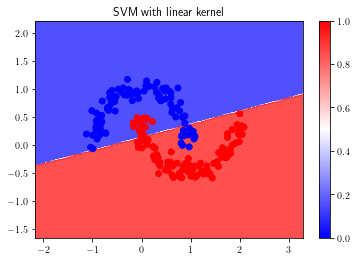

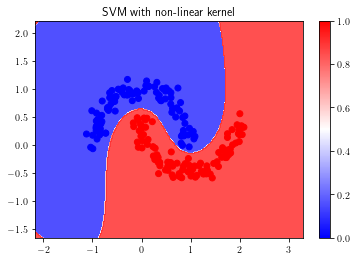

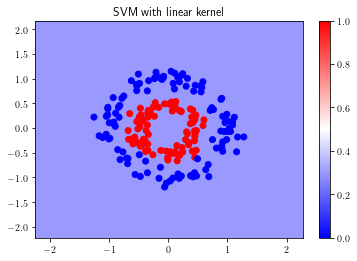

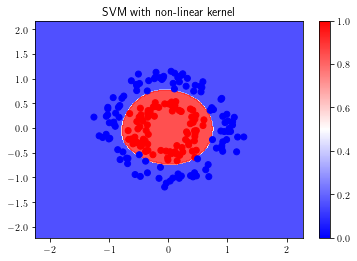

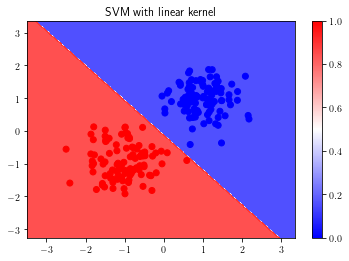

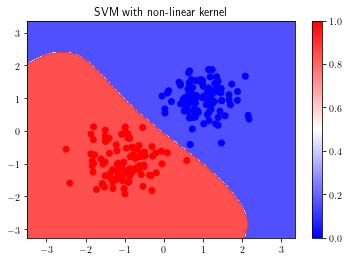

In [8]:
svm_moon_linear, svm_moon_non_linear = q1.svm_classifiers(X_moon_train, y_moon_train)
svm_circ_linear, svm_circ_non_linear = q1.svm_classifiers(X_circ_train, y_circ_train)
svm_blob_linear, svm_blob_non_linear = q1.svm_classifiers(X_blob_train, y_blob_train)

# plot the decision boundaries
plot_decision_bd(svm_moon_linear, X_moon, y_moon, X_moon_test, y_moon_test, name='linear kernel')
plot_decision_bd(svm_moon_non_linear, X_moon, y_moon, X_moon_test, y_moon_test, name='non-linear kernel')

# plot decision boundaries for the other two datasets
plot_decision_bd(svm_circ_linear, X_circ, y_circ, X_circ_test, y_circ_test, name='linear kernel')
plot_decision_bd(svm_circ_non_linear, X_circ, y_circ, X_circ_test, y_circ_test, name='non-linear kernel')

plot_decision_bd(svm_blob_linear, X_blob, y_blob, X_blob_test, y_blob_test, name='linear kernel')
plot_decision_bd(svm_blob_non_linear, X_blob, y_blob, X_blob_test, y_blob_test, name='non-linear kernel')

## Problem 1-2: Compute accuracy, precision and recall of a classifier (15 points)
First, let's define true positive ($TP$), true negative ($TN$), false positive ($FP$) and false negative ($FN$).
* $TP$: The number of positive data samples that are correctly classified as positive by the classifier.
* $TN$: The number of negative data samples that are correctly classified as negative by the classifier.
* $FP$: The number of negative data samples that are incorrectly classified as positive by the classifier.
* $FN$: The number of positive data samples that are incorrectly classified as negative by the classifier.

Based on the above definitions, we define accuracy, precision and recall.

Accuracy of a classificatier is defined as:

\begin{align}
\textrm{Accuracy} = \frac{\textrm{Number of correct predictions}}{\textrm{Total number of predictions}} = \frac{TP+TN}{TP+FP+TN+FN}
\tag 1
\end{align}

Precision of a classification model is:
\begin{align}
\textrm{Precision} = \frac{TP}{TP+FP}
\tag 2
\end{align}
Precision shows among the samples that are predicted as positive ($TP+FP$), how many of them are actually positive ($TP$, labeled positive).

Recall is defined as:
\begin{align}
\textrm{Recall} = \frac{TP}{TP+FN}
\tag 3
\end{align}
Recall shows what proportion of the actual positives were identified correctly.

Based on the above definitions, write a function that returns accuracy, precision and recall given the predictions from your trained svm model and a test set.

The inputs to your model are:
* $y_{predict}$: predicted labels by your trained SVM model. A numpy.ndarray of length $N$.
* $y_{test}$: Ground truth test labels. A numpy.ndarray of length $N$.

The outputs of your model are:
* Accuracy (a scalar)
* Precision (a scalar)
* Recall (a scalar)

Add your code to `Question1.acc_prec_recall` in `main.py`.

In [9]:
def print_acc_prec_recall(acc, prec, recall):
    print('Accuracy: {0:.4f}'.format(acc))
    print('Precision: {0:.4f}'.format(prec))
    print('Recall: {0:.4f}\n'.format(recall))

## Visualization: Check the performance of the SVM models

In [10]:
# Two-moon dataset----------------
y_pred = svm_moon_linear.predict(X_moon_test)
acc_moon_linear, prec_moon_linear, recall_moon_linear = q1.acc_prec_recall(y_pred, y_moon_test)

print('Two-moon dataset, SVM with linear kernel')
print_acc_prec_recall(acc_moon_linear, prec_moon_linear, recall_moon_linear)

y_pred = svm_moon_non_linear.predict(X_moon_test)
acc_moon_non_linear, prec_moon_non_linear, recall_moon_non_linear = q1.acc_prec_recall(y_pred, 
                                                                                       y_moon_test)

print('Two-moon dataset, SVM with non-linear kernel')
print_acc_prec_recall(acc_moon_non_linear, prec_moon_non_linear, recall_moon_non_linear)

# Circles dataset----------------
# Add your code here to print results for circles dataset
y_pred = svm_circ_linear.predict(X_circ_test)
acc_circ_linear, prec_circ_linear, recall_circ_linear = q1.acc_prec_recall(y_pred, y_circ_test)

print('Circles dataset, SVM with linear kernel')
print_acc_prec_recall(acc_circ_linear, prec_circ_linear, recall_circ_linear)

y_pred = svm_circ_non_linear.predict(X_circ_test)
acc_circ_non_linear, prec_circ_non_linear, recall_circ_non_linear = q1.acc_prec_recall(y_pred, 
                                                                                       y_circ_test)

print('Circles dataset, SVM with non-linear kernel')
print_acc_prec_recall(acc_circ_non_linear, prec_circ_non_linear, recall_circ_non_linear)

# Blobs dataset----------------
# Add your code here to print results for blobs dataset
y_pred = svm_blob_linear.predict(X_blob_test)
acc_blob_linear, prec_blob_linear, recall_blob_linear = q1.acc_prec_recall(y_pred, y_blob_test)

print('Blobs dataset, SVM with linear kernel')
print_acc_prec_recall(acc_blob_linear, prec_blob_linear, recall_blob_linear)

y_pred = svm_blob_non_linear.predict(X_blob_test)
acc_blob_non_linear, prec_blob_non_linear, recall_blob_non_linear = q1.acc_prec_recall(y_pred, 
                                                                                       y_blob_test)

print('Blobs dataset, SVM with non-linear kernel')
print_acc_prec_recall(acc_blob_non_linear, prec_blob_non_linear, recall_blob_non_linear)

Two-moon dataset, SVM with linear kernel
Accuracy: 0.8550
Precision: 0.8700
Recall: 0.8447

Two-moon dataset, SVM with non-linear kernel
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000

Circles dataset, SVM with linear kernel
Accuracy: 0.4500
Precision: 0.4500
Recall: 1.0000

Circles dataset, SVM with non-linear kernel
Accuracy: 0.9950
Precision: 0.9890
Recall: 1.0000

Blobs dataset, SVM with linear kernel
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000

Blobs dataset, SVM with non-linear kernel
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000



## Problem 1-3: Comparison between the SVMs (6 points)
Based on the function you wrote in problem 1-2, compare the two SVMs with linear and RBF kernel on all three datasets. On each dataset, explain which SVM model performs better and why?

#### For datasets 1 and 2, the SVM with a RBF kernel performs better because both datasets are non-linear. For dataset 3, the SVM with a linear kernel performs better because the dataset is linear and using a RBF kernel is more expensive to train.

# Problem 2: Compute cross-correlations in 1D (10 points)

In this problem, we learn about cross-correlation function and how we can use them to shift align two signals in 1D.

Assume we have two 1D signals, $x_1, x_2 \in \mathbb{R}^d$. You can think of the two signals as vectors of length $d$, in other words $x_1 = [x_1[0], x_1[1], ..., x_1[d-1]]$ and $x_2 = [x_2[0], x_2[1], ..., x_2[d-1]]$. We define the cross-correlation function (CCF) between $x_1$ and $x_2$ as:
\begin{align}
c_{x_1, x_2}[m] = \sum\limits_{k=0}^{d-1} x_1[k]_d x_2[m+k]_d , \, m \in \{0, 1, ..., d-1\}
\tag 1
\end{align}
where $x[k]_d = x[k \textrm{ mod } d]$ and $k \textrm{ mod } d$ is the remainder of dividing $k$ by $d$. Note that the above definition for the CCF implies a periodic boundary condition. In other words, we assume that the signals $x_1$ and $x_2$ are periodic with period $d$.

Let's first visualize an example of $x_1$ and $x_2$.

In [11]:
d = 61
x1 = np.zeros((d,))
x1[5:20] = 1.
x1 -= 0.5

x2 = np.zeros((d,))
x2[d-15:d] = 1.
x2 -= 0.5

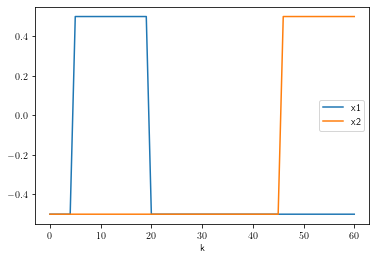

In [12]:
plt.figure()
plt.plot(x1, label='x1')
plt.plot(x2, label='x2')
plt.legend()
plt.xlabel('k')
plt.show()

### Problem 2-1: Compute cross correlation function (5 points)

Given two 1D signals $x_1$ and $x_2$, write a function which computes their CCF based on Eq. (1).

Inputs:
* $x_1$ and $x_2$, two numpy.ndarrays of length $d$

Output:
* The CCF, a numpy.ndarray of length $d$

Add your code to `Question2.CCF_1d` in `main.py`.

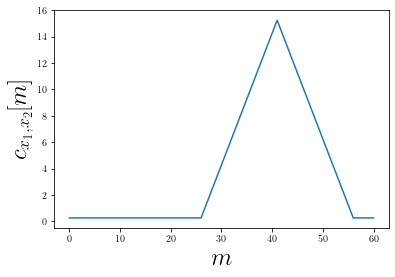

In [13]:
# plot the CCF results
ccf = q2.CCF_1d(x1, x2)
plt.figure()
plt.plot(ccf)
plt.xlabel(r'$m$', fontsize=25)
plt.ylabel(r'$c_{x_1, x_2}[m]$', fontsize=25)
plt.show()

### Problem 2-2: Align two signals  (5 points)
Given two 1D signals, align them so that they have the maximum cross correlation. You can use the function you wrote in problem 2-1.

Inputs:
* $x_1$ and $x_2$, two numpy.ndarrays of length $d$

Output:
* Align $x_2$ with $x_1$. The aligned vector is a numpy.ndarray of length $d$. 

Add your code to `Question2.align_1d` in `main.py`.

Optional: Can you solve Problem 2-2 using FFT and its properties?

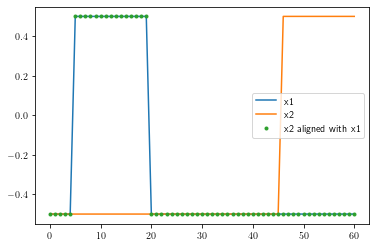

In [14]:
aligned_signal = q2.align_1d(x1, x2)

plt.figure()
plt.plot(x1, label='x1')
plt.plot(x2, label='x2')
plt.plot(aligned_signal, '.', label='x2 aligned with x1')
plt.legend()
plt.show()

## Problem 3: Cross-correlation and alignment between images (20 points)

In this problem, we extend what we learned in problem 1 to two dimensional signals, i.e. images.

Assume we have two 2D imagesc, $x_1, x_2 \in \mathbb{R}^{d \times d}$. You can think of the two matrices of shape $d \times d$. We define the cross-correlation function (CCF) between $x_1$ and $x_2$ as:
\begin{align}
c_{x_1, x_2}[m, n] = \sum\limits_{m'=0}^{d-1} \sum\limits_{n'=0}^{d-1} x_1[m', n']_d x_2[m'+m, n'+n]_d , \, m, n \in \{0, 1, ..., d-1\}
\tag 2
\end{align}
where $x[m, n]_d = x[m \textrm{ mod } d, n \textrm{ mod } d]$ and $m \textrm{ mod } d$ is the remainder of dividing $m$ by $d$. Note that the above definition for the CCF implies a periodic boundary condition. In other words, we assume that the signals $x_1$ and $x_2$ are periodic with period $d$.

Let's first visualize an example of $x_1$ and $x_2$.

In [15]:
# load images
mat = scipy.io.loadmat('problem3_12.mat')
x1 = mat['x1']
x2 = mat['x2']

Text(0.5, 1.0, 'x2')

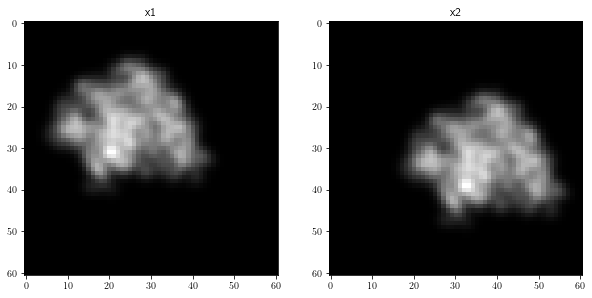

In [16]:
fix, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(x1, cmap='gray')
axes[0].set_title('x1')

axes[1].imshow(x2, cmap='gray')
axes[1].set_title('x2')

### Problem 3-1: Cross-correlation function of two images  (5 points)

Given two images $x_1$ and $x_2$, write a function which computes their CCF based on Eq. (2).

Inputs:
* $x_1$ and $x_2$, two numpy.ndarrays of shape $d \times d$

Output:
* The CCF, a numpy.ndarray of shape $d \times d$

Add your code to `Question3.CCF_2d` in `main.py`.

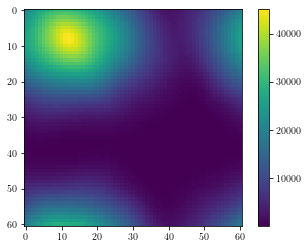

In [17]:
ccf = q3.CCF_2d(x1, x2)

plt.figure()
plt.imshow(ccf)
plt.colorbar()
plt.show()

### Problem 3-2: Align two images  (5 points)
Given two images, align them so that they have the maximum cross correlation. You can use the function you wrote in problem 3-1.

Inputs:
* $x_1$ and $x_2$, two numpy.ndarrays of shape $d \times d$.

Output:
* Align $x_2$ with $x_1$. The aligned image is a numpy.ndarray of shape $d \times d$. 

Add your code to `Question3.align_2d` in `main.py`.

Optional: Can you solve Problem 3-2 using FFT and its properties?

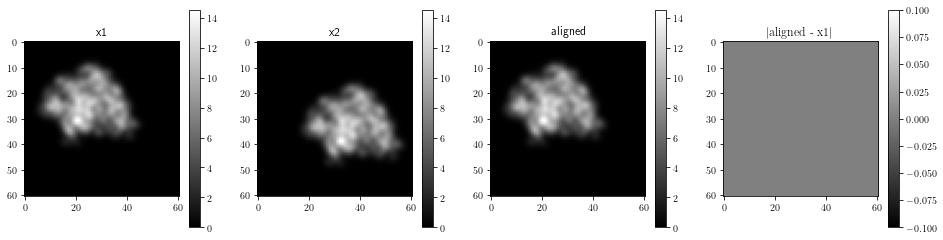

In [18]:
aligned_img = q3.align_2d(x1, x2)

fix, axes = plt.subplots(1, 4, figsize=(16, 4))
im = axes[0].imshow(x1, cmap='gray')
axes[0].set_title('x1')
plt.colorbar(im, ax=axes[0])

im = axes[1].imshow(x2, cmap='gray')
axes[1].set_title('x2')
plt.colorbar(im, ax=axes[1])

im = axes[2].imshow(aligned_img, cmap='gray')
axes[2].set_title('aligned')
plt.colorbar(im, ax=axes[2])

im = axes[3].imshow(np.abs(aligned_img-x1), cmap='gray')
axes[3].set_title(r'$| \textrm{aligned - x1} |$')
plt.colorbar(im, ax=axes[3])

### Problem 3-3: Detecting particle images (10 points)
In this problem, based on what we learned in the lectures, we try to detect whether an image contains a particle or not. 

Let's assume we are given a set of $M$ reference images $\{f_k\}_{k=1}^k$ and a query image $g$. The problem is stated as: does $g$ contain a particle or is it pure noise?

To find the answer to this question, we take the following steps:
* Compute the CCF between $g$ and all refernce images, i.e.
\begin{align}
c_{f_k, g}[m, n] = \sum\limits_{m'=0}^{d-1} \sum\limits_{n'=0}^{d-1} f_m[m', n']_d g[m'+m, n'+n]_d , \quad \forall k \in \{1, ..., M\}
\tag 3
\end{align}

You can use the function you used in the problem 3-1.
* Normalize the CCF following:
\begin{align}
\widehat{c}_{f_k, g} = c_{f_k, g} - \frac{1}{d^2} \sum\limits_{m=0}^{d-1} \sum\limits_{n=0}^{d-1} c_{f_k, g}[m, n] , \quad \forall k \in \{1, ..., M\}
\tag 4
\end{align}

* Define the respone signal as:
\begin{align}
s_g(k) = \max_{m, n} \widehat{c}_{f_k, g} [m, n], \quad k=1, ..., M
\tag 5
\end{align}

* Check the response signal. If it has large peaks, then the query image is likely to contain a particle. One can also determine this by plotting the histogram of $s_g$ values.

Follow the above steps and answer the two problems below.

<b>Question 1-</b> Write a function that takes as input the reference images and the query image and outputs the response signal.

Inputs:
* Reference images. A numpy.ndarray of shape $d \times d \times M$
* A query image. A numpy.ndarray of shape $d \times d$

Output:
* Response signal. A numpy.ndarray of length $M$. 

Add your code to `Question3.response_signal` in `main.py`. 
    
<b>Question 2-</b> Does img1 and img2 (visualized below) contain a particle? Explain based on the response signal defined earlier and include any visualizations below. This problem is NOT graded by autograder and graded after the submission deadline.

#### As mentioned above, large spikes in the response signal indicate that there is likely a particle in the image. After plotting the histograms for both image's response signals, it is very likely that img1 contains a particle and img2 does not contain a particle. The response signal for img1 has large spikes and these spikes have a larger amplitude than the spikes in the response signal for img2.

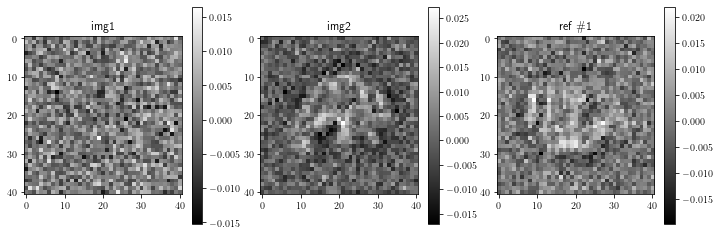

In [19]:
# load data
mat = scipy.io.loadmat('problem3_3.mat')
img1 = mat['img1']
img2 = mat['img2']
ref_images = mat['ref_images']

fix, axes = plt.subplots(1, 3, figsize=(12, 4))
im = axes[0].imshow(img1, cmap='gray')
axes[0].set_title('img1')
plt.colorbar(im, ax=axes[0])

im = axes[1].imshow(img2, cmap='gray')
axes[1].set_title('img2')
plt.colorbar(im, ax=axes[1])

im = axes[2].imshow(ref_images[:, :, 1], cmap='gray')
axes[2].set_title('ref \#1')
plt.colorbar(im, ax=axes[2])

In [20]:
rs1 = q3.response_signal(ref_images, img1)
rs2 = q3.response_signal(ref_images, img2)

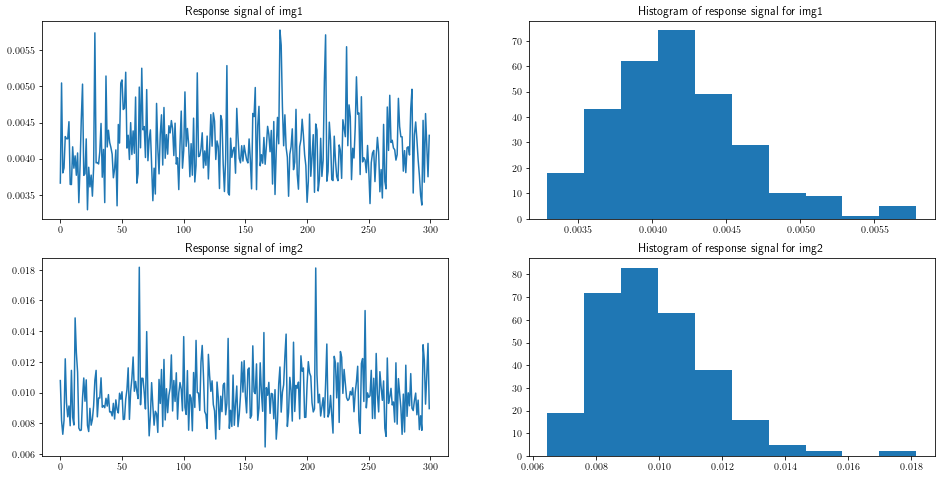

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

axes[0][0].plot(rs1)
axes[0][0].set_title('Response signal of img1')

axes[1][0].plot(rs2)
axes[1][0].set_title('Response signal of img2')

axes[0][1].hist(rs1)
axes[0][1].set_title('Histogram of response signal for img1')

axes[1][1].hist(rs2)
axes[1][1].set_title('Histogram of response signal for img2')

plt.show()

## And this concludes Lab 11! Congratulations!